In [2]:
import numpy as np
import numpy.linalg as la
from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 15})
#%config InlineBackend.figure_format='retina'

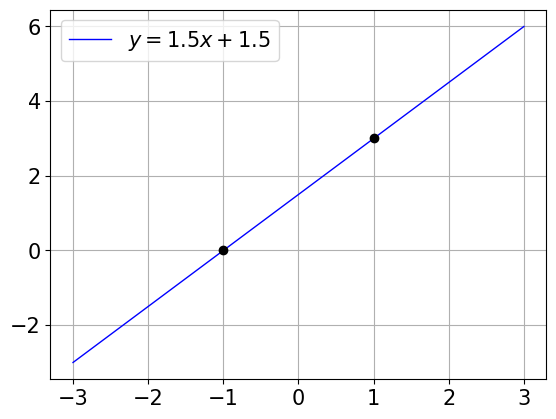

In [3]:
x1, y1 = -1, 0 # first point
x2, y2 =  1, 3 # second point

A = [
    [x1,  1],
    [x2,  1]
]
b = [y1, y2]

a, b = la.solve(A, b)

xs = np.linspace(-3, 3, 50)
ys = a*xs + b

plt.figure()
plt.plot(xs, ys, "-b", lw=1, label=f"$y = {a}x + {b}$")
plt.plot([x1, x2], [y1, y2], "ok")
plt.legend()
plt.grid()
plt.show()

In [6]:
def poly_fit(xs, ys):
    """Fit a polynominal of degree n that fits the all data points given.
    
    It returns coefficients, a_n, a_n-1, a_n-2, ..., a_1, a_0, in the polynomial
    
        p(x) = a_n*x^n + a_n-1*x^n-1 + a_n-2*x^n-2 + ... + a_1*x + a_0
    """
    assert len(xs) == len(ys)
    
    i = np.flip(range(len(xs))) # integer exponents are sorted in descending order
                                # so that the first element is the coefficent
                                # of the highest order term
    b = ys
    A = [x ** i for x in xs]
    
    return la.solve(A, b)

def poly_val(aj, x):
    """Evaluate the polynomial
    
        p(x) = a_n*x^n + a_n-1*x^n-1 + a_n-2*x^n-2 + ... + a_1*x + a_0
        
    at x given the coefficients, a_n, a_n-1, a_n-2, ..., a_1, a_0.
    """
    assert len(aj) > 1
    
    y = aj[0]
    for a in aj[1:]:
        y = y*x + a
    
    return y

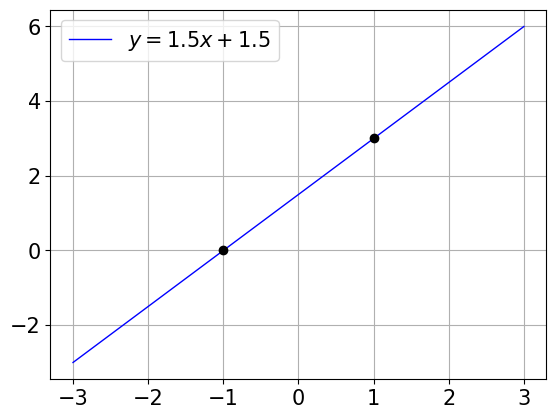

In [7]:
x1, y1 = -1, 0 # first point
x2, y2 =  1, 3 # second point

# 1-degree polynomial (i.e., line) fitting
coefs = poly_fit([x1, x2], [y1, y2])

# define the grid points to display the fit polynomial
x = np.linspace(-3, 3, 100)
p = poly_val(coefs, x)

plt.figure()
plt.plot(x, p, "-b", lw=1, label="$y = {0}x + {1}$".format(*coefs))
plt.plot([x1, x2], [y1, y2], "ok")
plt.legend()
plt.grid()
plt.show()

In [8]:
# exact coefficients
coefs_exact = [
     429/16,  # x^7
          0,  # x^6
    -693/16,  # x^5
          0,  # x^4
     315/16,  # x^3
          0,  # x^2
     -35/16,  # x^1
          0,  # x^0
]

def legendre_7th(x):
    return poly_val(coefs_exact, x)

# random points
N    = 7
xlim = -1, 1
xs   = np.random.uniform(*xlim, N + 1) # we need N + 1 points!
ys   = legendre_7th(xs)

# poly fit
coefs_fit  = poly_fit(xs, ys)

coefs_fit - coefs_exact

array([-3.22429372e-09, -4.74224851e-09,  2.22058816e-10,  3.32437633e-09,
        1.79730364e-09,  2.37451437e-10, -4.90727459e-11, -1.12829329e-11])

rms error = 4.159242657074596e-10


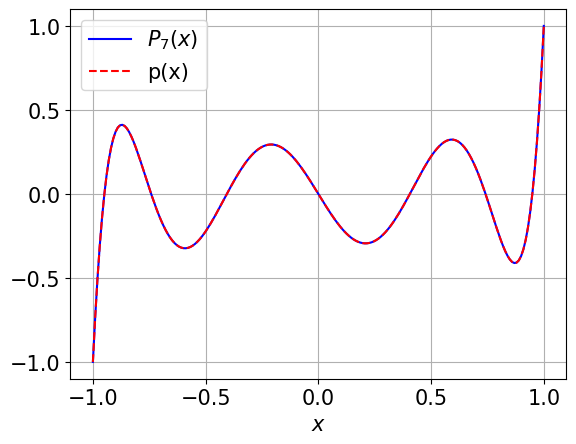

In [9]:
from scipy.special import eval_legendre

N = 7

# draw
xs = np.linspace(-1, 1, 200)
ys = eval_legendre(N, xs)
ps = poly_val(coefs_fit, xs)

print("rms error = {}".format(np.sqrt(np.mean((ys - ps)**2))))

plt.figure()

plt.plot(xs, ys, "-b", xs, ps, "--r")
plt.xlabel("$x$")
plt.legend([f"$P_{N}(x)$", "p(x)"])
plt.grid()

plt.show()

In [10]:
# data points
xi = np.array([     1.5, -     0.5, -     2.0])
yi = np.array([0.339488, -0.868547, -0.724478])

# matrix A
A = np.vstack([
    xi * xi,    # [x1^2, x2^2, x3^2]
    xi * yi,    # [x1y1, x2y2, x3y3]
    yi * yi,    # [y1^2, y2^2, y3^2]
]).T

# RHS
b = [1, 1, 1]

# linear solve
a, b, c = la.solve(A, b)

print(f"""
a = {a}, b = {b}, c = {c}
""")


a = 0.9938866604719617, b = -3.0505985227841554, c = 2.7523784381491376



In [11]:
def least_squares(X, y):
    """Returns the least-squares solution of the equation
    
        (X^T X)β = X^T y
        
    :param X:
        A matrix of size N x M.
    :param y:
        A column vector of length N.
    """
    XT = np.transpose(X)
    return la.solve(XT @ X, XT @ y)


beta_1 = 3.4999999999999987, beta_2 = 1.4000000000000004



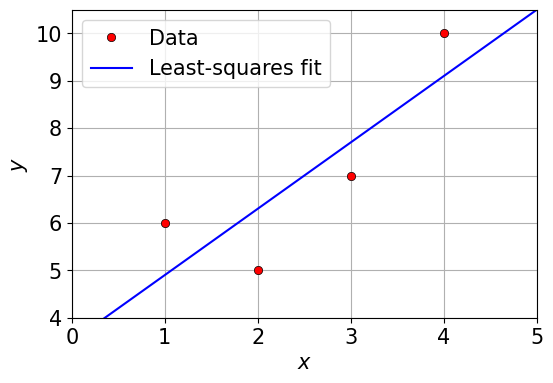

In [12]:
# data points
xi = [1, 2, 3,  4]
yi = [6, 5, 7, 10]

# define matrices, X and y
X = np.vstack([
    np.ones(len(xi)),
    xi
]).T
Y = yi

# find least-squares solution
b1, b2 = least_squares(X, Y)
print(f"""
beta_1 = {b1}, beta_2 = {b2}
""")

# draw
plt.figure(figsize=[6, 4])
ax = plt.subplot()

plt.plot(xi, yi, "or", markeredgewidth=0.5, markeredgecolor="k",
         label="Data")

xs = np.linspace(0, 5, 100)
ys = b1 + b2*xs
plt.plot(xs, ys, "-b", label="Least-squares fit")

plt.xlim([0, 5])
plt.ylim([4, 10.5])
plt.grid()
plt.legend()
ax.set_xticks(range(6))
plt.xlabel("$x$")
plt.ylabel("$y$")

plt.show()

In [13]:
c1, c2 = la.lstsq(X, Y, rcond=None)[0]
print(f"""Result from numpy.linalg.lstsq:

beta_1 = {c1}, beta_2 = {c2}
""")

Result from numpy.linalg.lstsq:

beta_1 = 3.4999999999999996, beta_2 = 1.4000000000000001




a = 1.0726812636427032, b = -3.274675186932553, c = 2.8910786182027257



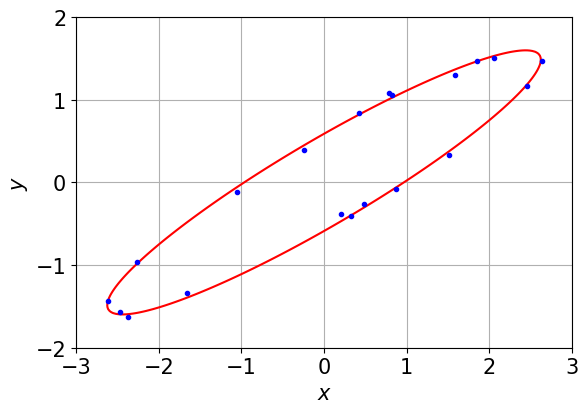

In [14]:
# data points
xi, yi = map(np.array, zip(*[
    [-2.46334563, -1.56845224],
    [ 2.63761337,  1.47389564],
    [ 0.32081604, -0.40868361],
    [ 1.58426449,  1.29565802],
    [ 0.42207065,  0.83838473],
    [ 1.51310164,  0.3286777 ],
    [ 0.8712766 , -0.08207119],
    [-0.2367237 ,  0.39619505],
    [-1.6625065 , -1.33260236],
    [ 2.45970384,  1.16775851],
    [ 0.20168962, -0.38754006],
    [ 0.48952169, -0.25543757],
    [-2.36931404, -1.63349134],
    [ 2.05834532,  1.509814  ],
    [-2.26005793, -0.95979945],
    [-2.61534704, -1.43735164],
    [ 0.78758072,  1.08449257],
    [-1.05029032, -0.1194829 ],
    [ 1.85306552,  1.47436698],
    [ 0.81894698,  1.0580295 ],
]))

# find least-squares solution
X = np.vstack([
    xi * xi,
    xi * yi,
    yi * yi,
]).T
Y = np.ones(len(X))

a, b, c = least_squares(X, Y)
print(f"""
a = {a}, b = {b}, c = {c}
""")

# draw
x = np.linspace(-3, 3, 201)
y = np.linspace(-2, 2, 181)
xx, yy = np.meshgrid(x, y)
zz = a*xx*xx + b*xx*yy + c*yy*yy

plt.figure()
plt.subplot().set_aspect("equal")
plt.contour(xx, yy, zz, [1.0], colors="r")
plt.plot(xi, yi, ".b", label="data")
plt.grid()
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.show()

In [15]:
w, v = la.eig([
    [a  , b/2],
    [b/2, c  ]
])
print("""
semi-minor = {}, semi-major = {}
""".format(*sorted(1/np.sqrt(w))))


semi-minor = 0.5093353051173539, semi-major = 3.028309546509392

